# Deep Learning and Image Recognition

## Hybrid Model -  CNN and MLP



In [3]:
from numpy.random import seed
from pandas import read_csv, DataFrame
from sklearn.preprocessing import scale
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers.merge import average
from keras.layers import Input, Dense, Flatten, Reshape, Dropout, SpatialDropout1D
from keras.models import Model
from keras.optimizers import SGD
from keras.utils import plot_model

In [15]:
from keras.datasets import boston_housing

(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

Y = y_train
X = x_train

#drop out rate
D = 0.2

#seed
S = 1

seed(S)

In [22]:
# Input Data
inputs = Input(shape = (X.shape[1],))

#Define MLP 
mlp_net = Dense(64, activation = 'relu', kernel_initializer = 'he_uniform')(inputs)
mlp_net = Dropout(rate = D, seed = S)(mlp_net)
mlp_net = Dense(64, activation = 'relu', kernel_initializer = 'he_uniform')(mlp_net)
mlp_net = Dropout(rate = D, seed = S)(mlp_net)
mlp_out = Dense(1, activation = 'sigmoid')(mlp_net)
mlp_mdl = Model(inputs = inputs, outputs = mlp_out)

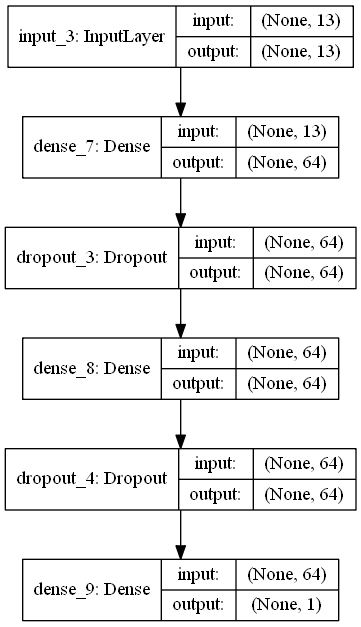

In [23]:
plot_model(mlp_mdl, show_shapes = True, show_layer_names = True)

In [17]:
#Define CNN 
cnv_net = Reshape((X.shape[1], 1))(inputs)
cnv_net = Conv1D(32, 4, activation = 'relu', padding = "same", kernel_initializer = 'he_uniform')(cnv_net)
cnv_net = MaxPooling1D(2)(cnv_net)
cnv_net = SpatialDropout1D(D)(cnv_net)
cnv_net = Flatten()(cnv_net)
cnv_out = Dense(1, activation = 'sigmoid')(cnv_net)
cnv_mdl = Model(inputs = inputs, outputs = cnv_out)

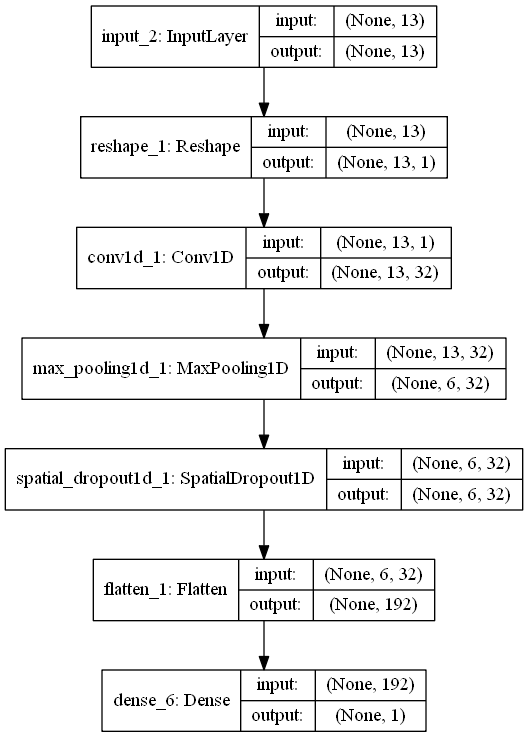

In [24]:
plot_model(cnv_mdl, show_shapes = True, show_layer_names = True)

In [20]:
# Combine NLP and CNN
con_out = average([mlp_out, cnv_out])
con_mdl = Model(inputs = inputs, outputs = con_out)
sgd = SGD(lr = 0.1, momentum = 0.9)
con_mdl.compile(optimizer = sgd, loss = 'binary_crossentropy',  metrics = ['binary_accuracy'])
history = con_mdl.fit(X, Y, batch_size = 2000, epochs = 50, verbose = 0)
con_mdl.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 13)           0                                            
__________________________________________________________________________________________________
reshape_1 (Reshape)             (None, 13, 1)        0           input_2[0][0]                    
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 64)           896         input_2[0][0]                    
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 13, 32)       160         reshape_1[0][0]                  
____________________________________________________________________________________________

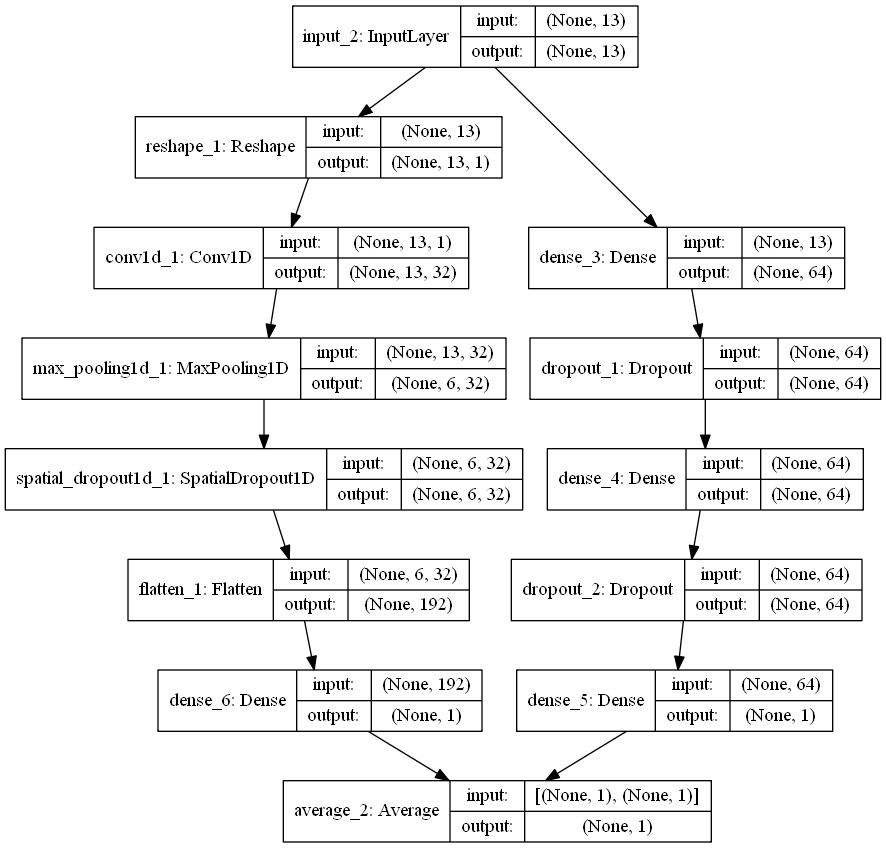

In [21]:
plot_model(con_mdl, show_shapes = True, show_layer_names = True)